
#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt

#PART I - Dataset Preprocessing


In [3]:
df = glob.glob('/content/drive/MyDrive/Colab Notebooks/Final Exam/Dataset/CICIDS_*')

In [4]:
df0 = pd.read_csv(df[0])
df1 = pd.read_csv(df[1])
df2 = pd.read_csv(df[2])
df3 = pd.read_csv(df[3])

<ipython-input-4-0b024a9e1b9d>:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(df[3])


In [5]:
df = pd.concat((df0, df1, df2, df3))
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613099,23,6,28/02/2018 11:59:12,3,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613100,425,6,28/02/2018 10:50:04,2,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration
613101,445,6,28/02/2018 12:52:55,732728,2,2,0,0,0,0,...,32,0,0,0,0,0,0,0,0,Benign
613102,23,6,28/02/2018 11:10:50,22,1,1,0,0,0,0,...,24,0,0,0,0,0,0,0,0,Infilteration


In [6]:
df.shape

(3758829, 80)

In [7]:
df['Label'].value_counts()

Label
Benign                   3255912
FTP-BruteForce            193360
SSH-Bruteforce            187589
Infilteration              68871
DoS attacks-GoldenEye      41508
DoS attacks-Slowloris      10990
Brute Force -Web             362
Brute Force -XSS             151
SQL Injection                 53
Label                         33
Name: count, dtype: int64

#PART I-1 - Dataset Downsampling

In [8]:
sample = df[df['Label'].isin(['Benign'])].sample(10000)
target = sample['Label']=='Benign'
benign_train, benign_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [9]:
sample = df[df['Label'].isin(['FTP-BruteForce'])].sample(500)
target = sample['Label']=='FTP-BruteForce'
FTP_train, FTP_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [10]:
sample = df[df['Label'].isin(['SSH-Bruteforce'])].sample(500)
target = sample['Label']=='SSH-Bruteforce'
SSH_train, SSH_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [11]:
sample = df[df['Label'].isin(['DoS attacks-GoldenEye'])].sample(500)
target = sample['Label']=='DoS attacks-GoldenEye'
GoldenEye_train, GoldenEye_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [12]:
sample = df[df['Label'].isin(['DoS attacks-Slowloris'])].sample(500)
target = sample['Label']=='DoS attacks-Slowloris'
slowloris_train, slowloris_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [13]:
sample = df[df['Label'].isin(['Brute Force -Web'])].sample(362)
target = sample['Label']=='Brute Force -Web'
web_train, web_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [14]:
sample = df[df['Label'].isin(['Brute Force -XSS'])].sample(151)
target = sample['Label']=='Brute Force -XSS'
xss_train, xss_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [15]:
sample = df[df['Label'].isin(['SQL Injection'])].sample(53)
target = sample['Label']=='SQL Injection'
injection_train, injection_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [16]:
sample = df[df['Label'].isin(['Infilteration'])].sample(1000)
target = sample['Label']=='Infilteration'
infilteration_train, infilteration_test = train_test_split(sample, test_size = 0.2, shuffle=True, stratify=target, random_state=777)

In [17]:
test = pd.concat([benign_test, FTP_test, SSH_test, GoldenEye_test, slowloris_test, web_test, xss_test, injection_test, infilteration_test])
test = test.reset_index(drop=True)
test

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,15086,6,23/02/2018 02:02:20,86031837,2,0,0,0,0,0,...,20,0.0,0.0,0,0,86031837.0,0.0,86031837,86031837,Benign
1,500,17,28/02/2018 08:41:12,89478291,6,0,3000,0,500,500,...,8,4000253,0,4000253,4000253,21369509.5,15280978.4242886,41989890,7200142,Benign
2,53,17,23/02/2018 04:34:25,94693,2,2,50,172,25,25,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,50286,6,15/02/2018 09:40:22,1,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,49949,6,23/02/2018 08:19:40,2047,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,3389,6,28/02/2018 02:24:47,27337028,8,11,1128,1581,661,0,...,20,1641013.0,2271023.605,4263365,328998,7429406.0,2930849.327,10700000,5157559,Infilteration
2711,443,6,28/02/2018 01:43:25,127,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration
2712,53,17,28/02/2018 02:30:13,351,1,1,42,58,42,42,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration
2713,443,6,28/02/2018 02:38:00,189,3,0,77,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration


In [18]:
train = pd.concat([benign_train, FTP_train, SSH_train, GoldenEye_train, slowloris_train, web_train, xss_train, injection_train, infilteration_train])
train = train.reset_index(drop=True)
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50610,6,15/02/2018 10:48:55,15,1,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,3389,6,28/02/2018 12:23:20,1693220,8,7,1128,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,80,6,28/02/2018 09:48:51,5843816,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
3,443,6,15/02/2018 03:55:52,204,3,0,77,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,3389,6,23/02/2018 09:10:40,3864004,14,8,1440,1731,725,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,52060,6,28/02/2018 02:07:46,542,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration
10847,53,17,28/02/2018 11:03:25,336,1,1,42,106,42,42,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration
10848,8545,6,28/02/2018 02:00:48,21,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Infilteration
10849,443,6,28/02/2018 02:02:20,99806962,21,27,1458,8548,333,0,...,20,431163.5,271774.37,623337,238990,49400000.0,13300000.0,58800000,40000000,Infilteration


In [19]:
#apply one-hot encoding
train['Label'] = train['Label'].apply(lambda x: 0 if x.startswith("Benign") else 1)
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50610,6,15/02/2018 10:48:55,15,1,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,3389,6,28/02/2018 12:23:20,1693220,8,7,1128,1581,661,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,80,6,28/02/2018 09:48:51,5843816,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0
3,443,6,15/02/2018 03:55:52,204,3,0,77,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3389,6,23/02/2018 09:10:40,3864004,14,8,1440,1731,725,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,52060,6,28/02/2018 02:07:46,542,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
10847,53,17,28/02/2018 11:03:25,336,1,1,42,106,42,42,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
10848,8545,6,28/02/2018 02:00:48,21,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,1
10849,443,6,28/02/2018 02:02:20,99806962,21,27,1458,8548,333,0,...,20,431163.5,271774.37,623337,238990,49400000.0,13300000.0,58800000,40000000,1


In [20]:
#apply one-hot encoding
test['Label'] = test['Label'].apply(lambda x: 0 if x.startswith("Benign") else 1)
test

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,15086,6,23/02/2018 02:02:20,86031837,2,0,0,0,0,0,...,20,0.0,0.0,0,0,86031837.0,0.0,86031837,86031837,0
1,500,17,28/02/2018 08:41:12,89478291,6,0,3000,0,500,500,...,8,4000253,0,4000253,4000253,21369509.5,15280978.4242886,41989890,7200142,0
2,53,17,23/02/2018 04:34:25,94693,2,2,50,172,25,25,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
3,50286,6,15/02/2018 09:40:22,1,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,49949,6,23/02/2018 08:19:40,2047,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,3389,6,28/02/2018 02:24:47,27337028,8,11,1128,1581,661,0,...,20,1641013.0,2271023.605,4263365,328998,7429406.0,2930849.327,10700000,5157559,1
2711,443,6,28/02/2018 01:43:25,127,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2712,53,17,28/02/2018 02:30:13,351,1,1,42,58,42,42,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
2713,443,6,28/02/2018 02:38:00,189,3,0,77,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [21]:
#drop unnecessary columns
train = train.drop(['Dst Port', 'Protocol', 'Timestamp'], axis=1)
test = test.drop(['Dst Port', 'Protocol', 'Timestamp'], axis=1)
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,15,1,1,0,0,0,0,0.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1693220,8,7,1128,1581,661,0,141.0,222.623321,1173,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,5843816,3,1,0,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0
3,204,3,0,77,0,46,0,25.666667,23.459184,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3864004,14,8,1440,1731,725,0,102.857143,191.172841,1179,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10846,542,2,1,38,0,38,0,19.0,26.870058,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
10847,336,1,1,42,106,42,42,42.0,0.0,106,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
10848,21,1,1,0,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,1
10849,99806962,21,27,1458,8548,333,0,69.428571,99.627592,1430,...,20,431163.5,271774.37,623337,238990,49400000.0,13300000.0,58800000,40000000,1


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flow Duration      2715 non-null   object
 1   Tot Fwd Pkts       2715 non-null   object
 2   Tot Bwd Pkts       2715 non-null   object
 3   TotLen Fwd Pkts    2715 non-null   object
 4   TotLen Bwd Pkts    2715 non-null   object
 5   Fwd Pkt Len Max    2715 non-null   object
 6   Fwd Pkt Len Min    2715 non-null   object
 7   Fwd Pkt Len Mean   2715 non-null   object
 8   Fwd Pkt Len Std    2715 non-null   object
 9   Bwd Pkt Len Max    2715 non-null   object
 10  Bwd Pkt Len Min    2715 non-null   object
 11  Bwd Pkt Len Mean   2715 non-null   object
 12  Bwd Pkt Len Std    2715 non-null   object
 13  Flow Byts/s        2709 non-null   object
 14  Flow Pkts/s        2715 non-null   object
 15  Flow IAT Mean      2715 non-null   object
 16  Flow IAT Std       2715 non-null   object


In [23]:
test = test.astype(float)
train = train.astype(float)

In [24]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
train.fillna(999, inplace=True)
test.fillna(999, inplace=True)

In [26]:
x_train = train.iloc[:, :-1].to_numpy() #independent variables
y_train = train.iloc[:, [-1]].to_numpy() #independent variables

x_test = test.iloc[:, :-1].to_numpy() #independent variables
y_test = test.iloc[:, [-1]].to_numpy() #independent variable

In [27]:
x_train.shape

(10851, 76)

In [28]:
y_train.shape

(10851, 1)

In [29]:
x_test.shape

(2715, 76)

In [30]:
y_test.shape

(2715, 1)

#PART II - NN Model

In [31]:
#CNN, maybe another: MLP, 6th in class and 10th lecture, random forest, decision tree
# Quiz 2: MUST PLACE THE 3 NUMBERS BEING MULTIPLIES THRU TENSOR SIZE CALCULATOR

#CONV1D, MAXPOOL1D BC OF CSV FILE

In [32]:
y_train = y_train.squeeze(1)

In [33]:
y_train.shape

(10851,)

In [34]:
y_test = y_test.squeeze(1)
y_test.shape

(2715,)

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
class Data(Dataset):
  def __init__(self, x, y):
    self.x = torch.FloatTensor(x).unsqueeze(1)
    self.y = torch.LongTensor(y)
    self.len = self.y.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [37]:
train = Data(x_train, y_train)
test = Data(x_test, y_test)

In [38]:
train_loader = DataLoader(train, batch_size=1000, shuffle=True)
test_loader = DataLoader(test, batch_size=len(test), shuffle=True)

In [39]:
learning_rate = 0.001
training_epochs = 20
batch_size = 64

In [40]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv1d(1, 76, kernel_size=2, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool1d(kernel_size=3, stride=1),
        nn.Dropout(0.5)
    )

    self.layer2 = torch.nn.Sequential(
        torch.nn.Conv1d(76, 128, kernel_size=2, stride=2, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool1d(kernel_size=3, stride=1),
        nn.Dropout(0.5)
    )


    self.layer3 = torch.nn.Sequential(
        torch.nn.Conv1d(128, 256, kernel_size=2, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool1d(kernel_size=2, stride=2),
        nn.Dropout(0.5)
    )

    self.fc = torch.nn.Linear(4608, 2, bias=True)
    torch.nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)


    out = out.view(out.size(0), -1) #reduce from 2d data to 1d data
    out = self.fc(out)

    return out

In [41]:
model = CNN()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch  1 / 20 Cost: 0.72706 Training ACC: 71.45%
Epoch  2 / 20 Cost: 0.55237 Training ACC: 77.79%
Epoch  3 / 20 Cost: 0.51769 Training ACC: 80.02%
Epoch  4 / 20 Cost: 0.50010 Training ACC: 77.67%
Epoch  5 / 20 Cost: 0.48178 Training ACC: 81.20%
Epoch  6 / 20 Cost: 0.46669 Training ACC: 82.49%
Epoch  7 / 20 Cost: 0.45506 Training ACC: 80.96%
Epoch  8 / 20 Cost: 0.44813 Training ACC: 80.73%
Epoch  9 / 20 Cost: 0.43639 Training ACC: 84.72%
Epoch 10 / 20 Cost: 0.42570 Training ACC: 81.90%
Epoch 11 / 20 Cost: 0.41195 Training ACC: 85.78%
Epoch 12 / 20 Cost: 0.40049 Training ACC: 87.31%
Epoch 13 / 20 Cost: 0.39210 Training ACC: 86.60%
Epoch 14 / 20 Cost: 0.38843 Training ACC: 87.78%
Epoch 15 / 20 Cost: 0.37776 Training ACC: 86.96%
Epoch 16 / 20 Cost: 0.37040 Training ACC: 86.72%
Epoch 17 / 20 Cost: 0.36703 Training ACC: 88.48%
Epoch 18 / 20 Cost: 0.35605 Training ACC: 88.48%
Epoch 19 / 20 Cost: 0.35590 Training ACC: 89.78%
Epoch 20 / 20 Cost: 0.34524 Training ACC: 86.96%


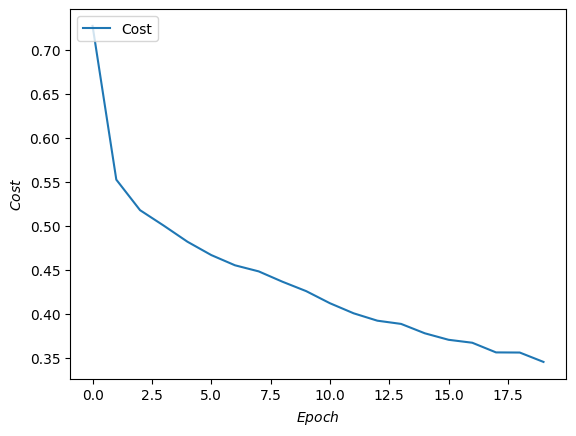

In [42]:
total_batch = len(train_loader)

x_axis = [] #epoch
y_axis = [] #cost

for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in train_loader:
    X = X
    Y = Y

    pred = model(X)
    cost = loss(pred, Y)
    correct_pred = torch.argmax(pred, axis=1) == Y
    accuracy = correct_pred.float().mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  x_axis.append(epoch)
  y_axis.append(avg_cost)

  print("Epoch {:2d} / {} Cost: {:.5f} Training ACC: {:.2f}%".format(epoch+1, 20, avg_cost, accuracy * 100))

x_axis = list(range(20))
y_axis = [avg_cost.item() for avg_cost in y_axis]
fig, x1 = plt.subplots()
x1.set_xlabel('$Epoch$')
x1.set_ylabel('$Cost$')
x1.plot(x_axis, y_axis, label="Cost")
x1.legend(loc='upper left')
plt.show()

In [43]:
model.eval()
with torch.no_grad():
  for data1, data2 in test_loader:

    x_test = data1
    y_test =  data2
    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()

  print('Testing Accuracy: {:.2f}%'.format(accuracy.item()*100))

Testing Accuracy: 89.21%


In [44]:
#Build confusion matrix using the f1 score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model(x_test)
y_pred = torch.argmax(y_pred, 1)

print(classification_report(y_test.cpu(), y_pred.cpu()))
print(confusion_matrix(y_test.cpu(), y_pred.cpu()))

#look at macro avg f1 score

#top right = False Neg
#top left = True Neg
#bottom right = True Pos
#bottom left = False Pos

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2000
           1       0.92      0.65      0.76       715

    accuracy                           0.89      2715
   macro avg       0.90      0.81      0.85      2715
weighted avg       0.89      0.89      0.89      2715

[[1959   41]
 [ 252  463]]
